In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
old_data = 'ctu-60-1/ctu-60-1_192.168.1.195.csv'

df_old = pd.read_csv(old_data)

In [3]:
sorted_df = df_old.sort_values(by='te')
sorted_df.shape

(624, 29)

In [4]:
display(df_old.head(5))

,ts,uid,sa,sp,da,dp,pr,stos,td,orig_bytes,...,resp_ip_bytes,tunnel_parents,label,detailed-label,te,teDelta,teT,teS,byt,pkt
0,1.568940e+09,CxKxhj4MGsf5GcqoX6,192.168.1.1,47805,192.168.1.195,22,tcp,-,206.663644,2768.0,...,36368.0,-,Benign,-,2019-09-20 00:40:41.665906944,0.000000,0,2441,76688.0,668
1,1.568940e+09,CEjjLs1iwWYrt8C4O6,192.168.1.195,123,212.111.30.190,123,udp,-,0.008239,96.0,...,152.0,-,Benign,-,2019-09-20 00:40:58.775321856,17.109415,0,2458,496.0,4
2,1.568940e+09,CHNzmm3tMu5Gse9Zvg,192.168.1.195,123,89.221.218.101,123,udp,-,0.007496,96.0,...,152.0,-,Benign,-,2019-09-20 00:41:59.775272960,60.999951,0,2519,496.0,4
3,1.568940e+09,CDlbowGNUwsHckADd,192.168.1.195,37120,102.165.48.81,17769,tcp,-,1.848549,518.0,...,540.0,-,Malicious,C&C-HeartBeat,2019-09-20 00:43:51.016249856,111.240977,0,2631,2696.0,18
4,1.568940e+09,C2n3PK3bA92hAgTHda,192.168.1.195,37122,102.165.48.81,17769,tcp,-,1.902519,518.0,...,540.0,-,Malicious,C&C-HeartBeat,2019-09-20 00:44:11.392718080,20.376468,0,2651,2696.0,18


In [5]:
gen_data = 'ctu-60-1/ctu-60-1-generated_new.csv'

In [6]:
df_gen = pd.read_csv(gen_data)

In [7]:
df_gen.shape

(159, 10)

In [8]:
display(df_gen.head(10))

,hour,time_delta,byt,pkt,time_duration,sp,dp,sa,da,pr
0,0,0.000000,1,1,345.625166,39907,122,192.168.1.195,193.183.76.82,TCP
1,0,0.000000,2,436,335.356014,53265,122,192.168.1.195,1.116.168.52,TCP
2,0,741.977617,1,59,0.000000,59693,22,192.168.1.195,149.128.168.147,TCP
3,0,0.000000,1,29954,308.274057,50066,122,192.168.1.195,5.1.251.154,UDP
4,0,24.468991,1,3849,0.000000,35652,80,192.168.1.195,1.255.93.13,TCP
5,0,1342.259204,1,14,35.909643,34406,22,192.168.1.195,1.1.93.153,UDP
6,0,634.313947,1,11798,0.000000,58586,22,192.168.1.195,193.1.76.124,UDP
7,0,355.988087,1,8,243.168421,36019,122,192.168.1.195,1.1.97.60,UDP
8,0,379.628959,1,7814,276.160535,59683,442,192.168.1.195,5.100.93.50,UDP
9,0,1192.597230,1,28525,168.959623,122,52,192.168.1.195,1.183.231.192,UDP


# Comparison

## Flow time

In [9]:
df2 = (sorted_df.teT
       .value_counts()
       .rename_axis('flow_time')
       .reset_index(name='count'))


df_kk = sorted_df.sample(n=159)
df_kk = (df_kk.teT
       .value_counts()
       .rename_axis('flow_time')
       .reset_index(name='count'))


In [10]:
display(df2.head())

,flow_time,count
0,0,78
1,1,64
2,5,25
3,7,25
4,2,24


In [11]:
df2 = df2.sort_values(by='flow_time')

In [12]:
df_kk.shape

(24, 2)

In [13]:
df_kk

,flow_time,count
0,0,17
1,1,15
2,10,9
3,17,9
4,6,9
5,2,8
6,19,7
7,13,7
8,11,7
9,23,7


In [14]:
df2_dict = df_kk.to_dict()

In [15]:
# df2_dict

In [16]:
x_values = [i for i in range(24)]
y_values = [0 for i in range(24)]
print(y_values)
for k,v in df2_dict['count'].items():
    time = int(df2_dict['flow_time'][k])
    print(time)
    y_values[time] = v
print(y_values)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1
10
17
6
2
19
13
11
23
4
21
12
8
18
22
9
5
14
15
16
3
20
7
[17, 15, 8, 4, 6, 4, 9, 3, 5, 4, 9, 7, 6, 7, 4, 4, 4, 9, 5, 7, 4, 6, 5, 7]


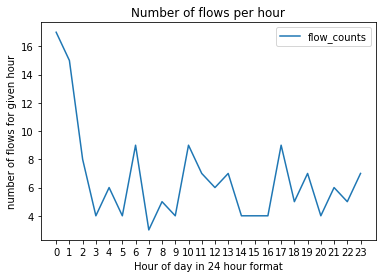

In [17]:
plt.figure(0)
plt.plot(y_values, label='flow_counts')
plt.xticks(x_values)
plt.title("Number of flows per hour")
plt.xlabel("Hour of day in 24 hour format")
plt.ylabel("number of flows for given hour")
plt.legend()
plt.show()

In [18]:
gen_sorted_df = df_gen.sort_values(by='hour')
gen_sorted_df.tail()

,hour,time_delta,byt,pkt,time_duration,sp,dp,sa,da,pr
153,22,0.000000,1,1895,0.000000,47476,80,192.168.1.195,193.1.168.93,UDP
154,22,0.000000,1,740,335.528543,44023,22,192.168.1.195,5.128.93.60,TCP
155,22,321.263685,1,54,0.000000,47469,122,192.168.1.195,1.116.168.140,TCP
156,22,508.156236,30,1,0.000000,36878,80,192.168.1.195,5.182.168.93,UDP
158,22,893.699712,1,10,119.822427,55519,52,192.168.1.195,1.182.231.13,UDP


In [19]:
gen_df2 = (gen_sorted_df.hour
       .value_counts()
       .rename_axis('flow_time')
       .reset_index(name='count'))

In [20]:
gen_df2.shape

(17, 2)

In [21]:
gen_df2_dict = gen_df2.to_dict()

In [22]:
x_values = [i for i in range(24)]
y_values_2 = [0 for i in range(24)]
# print(y_values_2)
for k,v in gen_df2_dict['count'].items():
    time = gen_df2_dict['flow_time'][k]
    y_values_2[time] = v
print(y_values_2)

[10, 3, 5, 5, 13, 0, 13, 0, 6, 15, 0, 8, 3, 12, 0, 7, 18, 0, 8, 13, 0, 6, 14, 0]


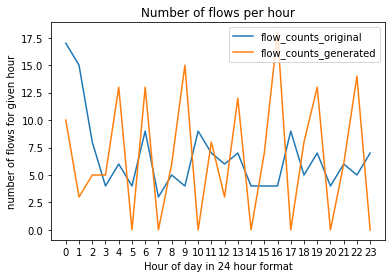

In [23]:
plt.figure(0)
plt.plot(y_values, label='flow_counts_original')
plt.plot(y_values_2, label='flow_counts_generated')

plt.xticks(x_values)
plt.title("Number of flows per hour")
plt.xlabel("Hour of day in 24 hour format")
plt.ylabel("number of flows for given hour")
plt.legend()

## Protocol Distribution

In [24]:
# df_group_proto = (df_old['pr']
#        .value_counts()
#        .rename_axis('protocol')
#        .reset_index(name='count'))

<AxesSubplot:>

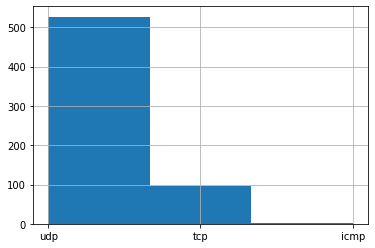

In [27]:
sorted_df = sorted_df.sort_values(by='pr', ascending=False)
sorted_df.pr.hist(bins=3)

<AxesSubplot:>

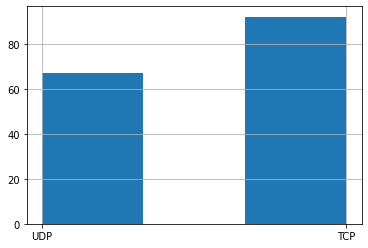

In [28]:
gen_sorted_df = gen_sorted_df.sort_values(by='pr', ascending=False)
gen_sorted_df.pr.hist(bins=3)

## Source port

array([[<AxesSubplot:title={'center':'sp'}>]], dtype=object)

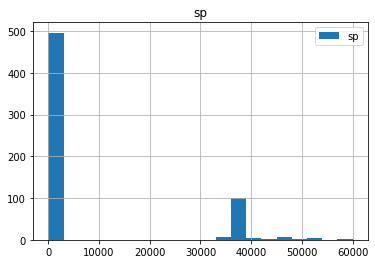

In [29]:
sorted_df.hist(column='sp',bins=20, legend=True,sharex=True,sharey=True)

<AxesSubplot:>

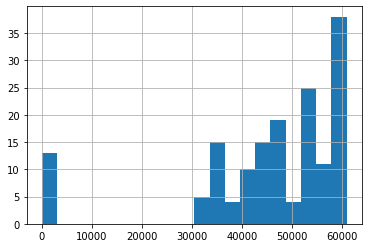

In [30]:
gen_sorted_df.sp.hist(bins=20)

## Destination Port

<AxesSubplot:>

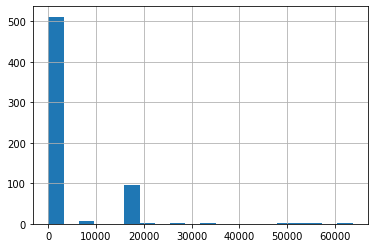

In [31]:
sorted_df.dp.hist(bins=20)

<AxesSubplot:>

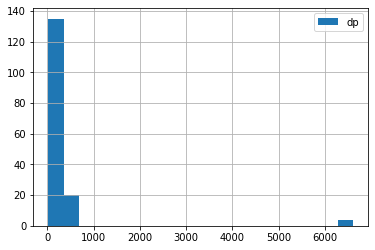

In [32]:
gen_sorted_df.dp.hist(bins=20, legend=True)

## Packets

<AxesSubplot:>

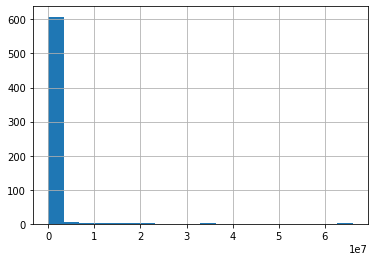

In [33]:
sorted_df.pkt.hist(bins=20)

<AxesSubplot:>

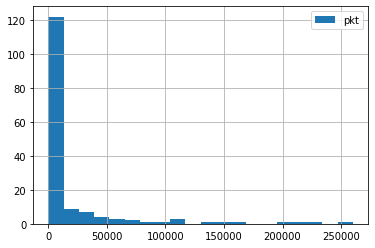

In [34]:
gen_sorted_df.pkt.hist(bins=20, legend=True)

## Bytes

<AxesSubplot:>

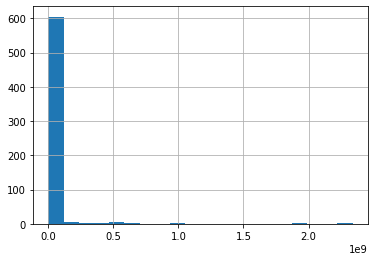

In [35]:
sorted_df.byt.hist(bins=20)

<AxesSubplot:>

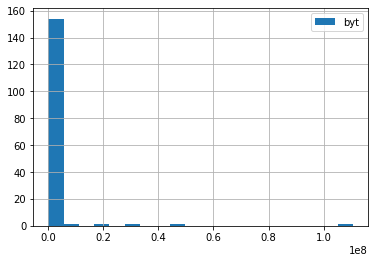

In [36]:
gen_sorted_df.byt.hist(bins=20, legend=True)